# Zarr (v2) store reading with xtensor-zarr

In this notebook we use [zarr-python](https://github.com/zarr-developers/zarr-python) to chunk an array and store it in a store (in Zarr v2 format). We then read it with [xtensor-zarr](https://github.com/xtensor-stack/xtensor-zarr), which supports reading Zarr v2 stores.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import zarr

In [2]:
a = imread('marie_curie.jpg')

In [3]:
a

array([[69, 68, 68, ..., 74, 78, 81],
       [71, 71, 71, ..., 77, 80, 82],
       [74, 75, 75, ..., 78, 80, 81],
       ...,
       [13, 14, 15, ..., 70, 70, 68],
       [15, 17, 19, ..., 70, 70, 68],
       [11, 13, 15, ..., 70, 69, 68]], dtype=uint8)

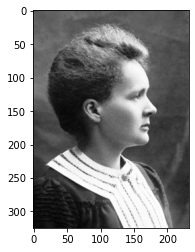

In [4]:
plt.imshow(a, cmap='Greys_r')

In [5]:
a.shape

(325, 232)

## Store the array in Zarr v2

In [6]:
!rm -rf marie_curie.zarr marie_curie2.zarr

In [7]:
z = zarr.open('marie_curie.zarr', mode='w', shape=a.shape, chunks=(30, 20), dtype=a.dtype)

In [8]:
z[:] = a

In [9]:
!ls marie_curie.zarr

0.0   0.9    10.7  1.7	 2.6   3.5   4.4   5.3	 6.2   7.11  8.10  9.1
0.1   1.0    10.8  1.8	 2.7   3.6   4.5   5.4	 6.3   7.2   8.11  9.10
0.10  10.0   10.9  1.9	 2.8   3.7   4.6   5.5	 6.4   7.3   8.2   9.11
0.11  10.1   1.1   2.0	 2.9   3.8   4.7   5.6	 6.5   7.4   8.3   9.2
0.2   10.10  1.10  2.1	 3.0   3.9   4.8   5.7	 6.6   7.5   8.4   9.3
0.3   10.11  1.11  2.10  3.1   4.0   4.9   5.8	 6.7   7.6   8.5   9.4
0.4   10.2   1.2   2.11  3.10  4.1   5.0   5.9	 6.8   7.7   8.6   9.5
0.5   10.3   1.3   2.2	 3.11  4.10  5.1   6.0	 6.9   7.8   8.7   9.6
0.6   10.4   1.4   2.3	 3.2   4.11  5.10  6.1	 7.0   7.9   8.8   9.7
0.7   10.5   1.5   2.4	 3.3   4.2   5.11  6.10  7.1   8.0   8.9   9.8
0.8   10.6   1.6   2.5	 3.4   4.3   5.2   6.11  7.10  8.1   9.0   9.9


The array consists of about 100 chunks.

In [1]:
>xcpp14
#pragma cling add_include_path("../include")

In [2]:
>xcpp14
#pragma cling add_library_path("$CONDA_PREFIX/lib")

In [3]:
>xcpp14
#pragma cling load("blosc")

In [4]:
>xcpp14
#include "xtensor/xio.hpp"
#include "xtensor/xview.hpp"
#include "xwidgets/ximage.hpp"
#include "xtensor/xchunked_array.hpp"
#include "xtensor-io/xio_blosc.hpp"
#include "xtensor-io/xchunk_store_manager.hpp"
#include "xtensor-io/ximage.hpp"
#include "xtensor-zarr/xzarr_hierarchy.hpp"
#include "xtensor-zarr/xzarr_file_system_store.hpp"
#include "xtl/xbase64.hpp"
#include "xcpp/xdisplay.hpp"

## Read the Zarr store (v2) with xtensor-zarr

In [5]:
>xcpp14
xt::xzarr_register_compressor<xt::xzarr_file_system_store, xt::xio_blosc_config>();
auto h = xt::get_zarr_hierarchy("marie_curie.zarr", "2");
auto z = h.get_array("");

In [6]:
>xcpp14
auto a = z.get_array<uint8_t>();
a

69,68,68,⋯,74,78,81
71,71,71,⋯,77,80,82
74,75,75,⋯,78,80,81
⋮,⋮,⋮,⋱,⋮,⋮,⋮
13,14,15,⋯,70,70,68
15,17,19,⋯,70,70,68
11,13,15,⋯,70,69,68


In [7]:
>xcpp14
std::vector<char> read_file(const char* filename)
{
    std::basic_ifstream<char> file(filename, std::ios::binary);
    return std::vector<char>((std::istreambuf_iterator<char>(file)), std::istreambuf_iterator<char>());
}

In [8]:
>xcpp14
template <class E>
std::vector<char> to_png_buffer(const xt::xexpression<E>& e)
{
    const char* temp_filename = "/tmp/xio_image.png";
    xt::dump_image(temp_filename, e);
    return read_file(temp_filename);
}

In [9]:
>xcpp14
xw::image img;
img.value = to_png_buffer(a);
img

A Jupyter widget

The original image has been reconstructed.

In [5]:
>xcpp14
auto h2 = xt::create_zarr_hierarchy("marie_curie2.zarr", "2");

In [6]:
>xcpp14
std::vector<std::size_t> shape = {325, 232};
std::vector<std::size_t> chunk_shape = {30, 20};
std::string dtype = "u2";
char chunk_memory_layout = 'C';
char chunk_separator = '.';
xt::xio_blosc_config compressor;
auto z2 = h2.create_array("", shape, chunk_shape, dtype);//, chunk_memory_layout, chunk_separator, compressor);

In [12]:
>xcpp14
z2 = z

Standard Exception: callback not found